 ### Bangalore Zomato Restaurants Data

In [172]:
# Importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Importing the data

In [64]:
df = pd.read_csv('D:\\Project 2_new\\zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [134]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Description of Attributes
1.url - contains the url of the restaurant in the zomato website

2.address - contains the address of the restaurant in Bengaluru

3.name - contains the name of the restaurant

4.online_order - whether online ordering is available in the restaurant or not

5.book_table  - table book option available or not

6.rate -  contains the overall rating of the restaurant out of 5

7.votes -  contains total number of rating for the restaurant as of the above mentioned date

8.phone -  contains the phone number of the restaurant

9.location -  contains the neighborhood in which the restaurant is located

10.rest_type -  restaurant type

11.dish_liked  - dishes liked by customers.

12.reviews_list - reviews of customers.

13.approx_cost(for two people)  - approximate cost for two people

14.listed_in(type) - mode of dining

15.listed_in(city)  - In which city the restaurent is listed.

16.menu_item

17.reviews_list - reviews from cutomers.


###### The data set has 51717 records and 17 attributes.The 'rate' is the target variable in this zomato restaurent dataset.

In [65]:
df.shape

(51717, 17)

In [66]:
## To get the basic statistical information about the continuous data in the dataset.
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df.shape

(51717, 17)

In [69]:
df.rest_type.value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Bakery, Food Court                2
Cafe, Food Court                  2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [70]:
# To view the datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [100]:
# Here we are dropping the columns which does not provide any information to predict the target(rate) variable.
new_df = df.drop(['url','address','phone','menu_item','listed_in(city)','dish_liked','reviews_list'],axis=1)

In [101]:
new_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [102]:
new_df.shape

(51717, 10)

## MISSING VALUE DETECTION

In [103]:
## Checking for missing values
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

37700

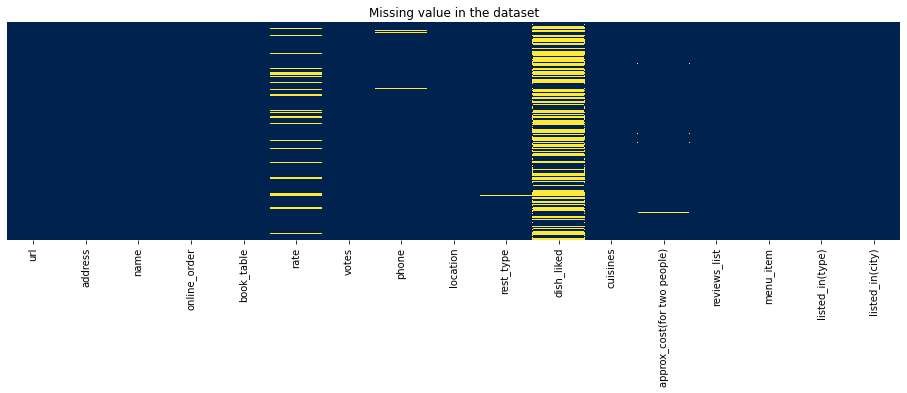

In [125]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull(),cbar=False,cmap='cividis',yticklabels=False)
plt.title('Missing value in the dataset');
df.isna().sum().sum()

In [104]:
new_df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [105]:
new_df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

In [106]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.3+ MB


In [107]:
# we are dropping the records if any value or all values in the record are null.
# Because treating missing values in anyother way won't help us to predict the ratings any better.
new_df.dropna(inplace=True)

In [108]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43533 non-null  object
 1   online_order                 43533 non-null  object
 2   book_table                   43533 non-null  object
 3   rate                         43533 non-null  object
 4   votes                        43533 non-null  int64 
 5   location                     43533 non-null  object
 6   rest_type                    43533 non-null  object
 7   cuisines                     43533 non-null  object
 8   approx_cost(for two people)  43533 non-null  object
 9   listed_in(type)              43533 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [109]:
# new_df.drop_duplicates(inplace=True)

In [110]:
# new_df.info()

In [111]:
new_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [112]:
## Now it is noticeable that the target variable has object as data type and  not have continuous data.
## so we change that into continuous.
new_df = new_df.loc[new_df['rate'] != 'NEW']
new_df = new_df.loc[new_df['rate'] != '-']

new_df['rate'] = new_df['rate'].str.replace('/5','')
new_df['rate'] = new_df['rate'].astype(float)
new_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [113]:
new_df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [114]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41263 non-null  object 
 1   online_order                 41263 non-null  object 
 2   book_table                   41263 non-null  object 
 3   rate                         41263 non-null  float64
 4   votes                        41263 non-null  int64  
 5   location                     41263 non-null  object 
 6   rest_type                    41263 non-null  object 
 7   cuisines                     41263 non-null  object 
 8   approx_cost(for two people)  41263 non-null  object 
 9   listed_in(type)              41263 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.5+ MB


In [115]:
new_df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [127]:
## Changing the values in approx_cost column to a proper format by removing unnecessary spaces in the data  to perform calculations.
new_df['approx_cost(for two people)'] = new_df['approx_cost(for two people)'].str.replace(',','')
new_df['approx_cost(for two people)'] = new_df['approx_cost(for two people)'].astype(int)
new_df.info()

AttributeError: Can only use .str accessor with string values!

In [128]:
new_df = new_df.reset_index(drop=True)
new_df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
41258,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
41259,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
41260,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars
41261,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars


##  Exploratory data analysis

<AxesSubplot:>

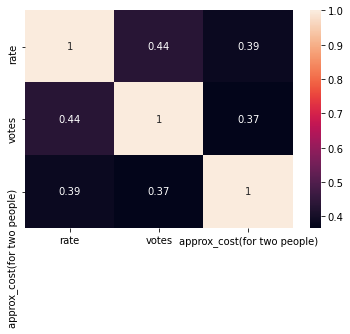

In [129]:
## correlation between attributes
sns.heatmap(new_df.corr(),annot=True)

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

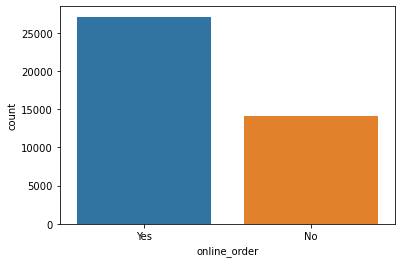

In [130]:
# To view the number of online orders.
sns.countplot(new_df.online_order)

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

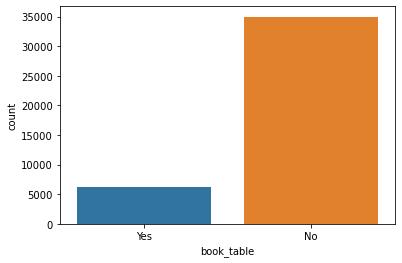

In [131]:
# To know how many times the tables were booked before handedly..
sns.countplot(new_df.book_table)

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


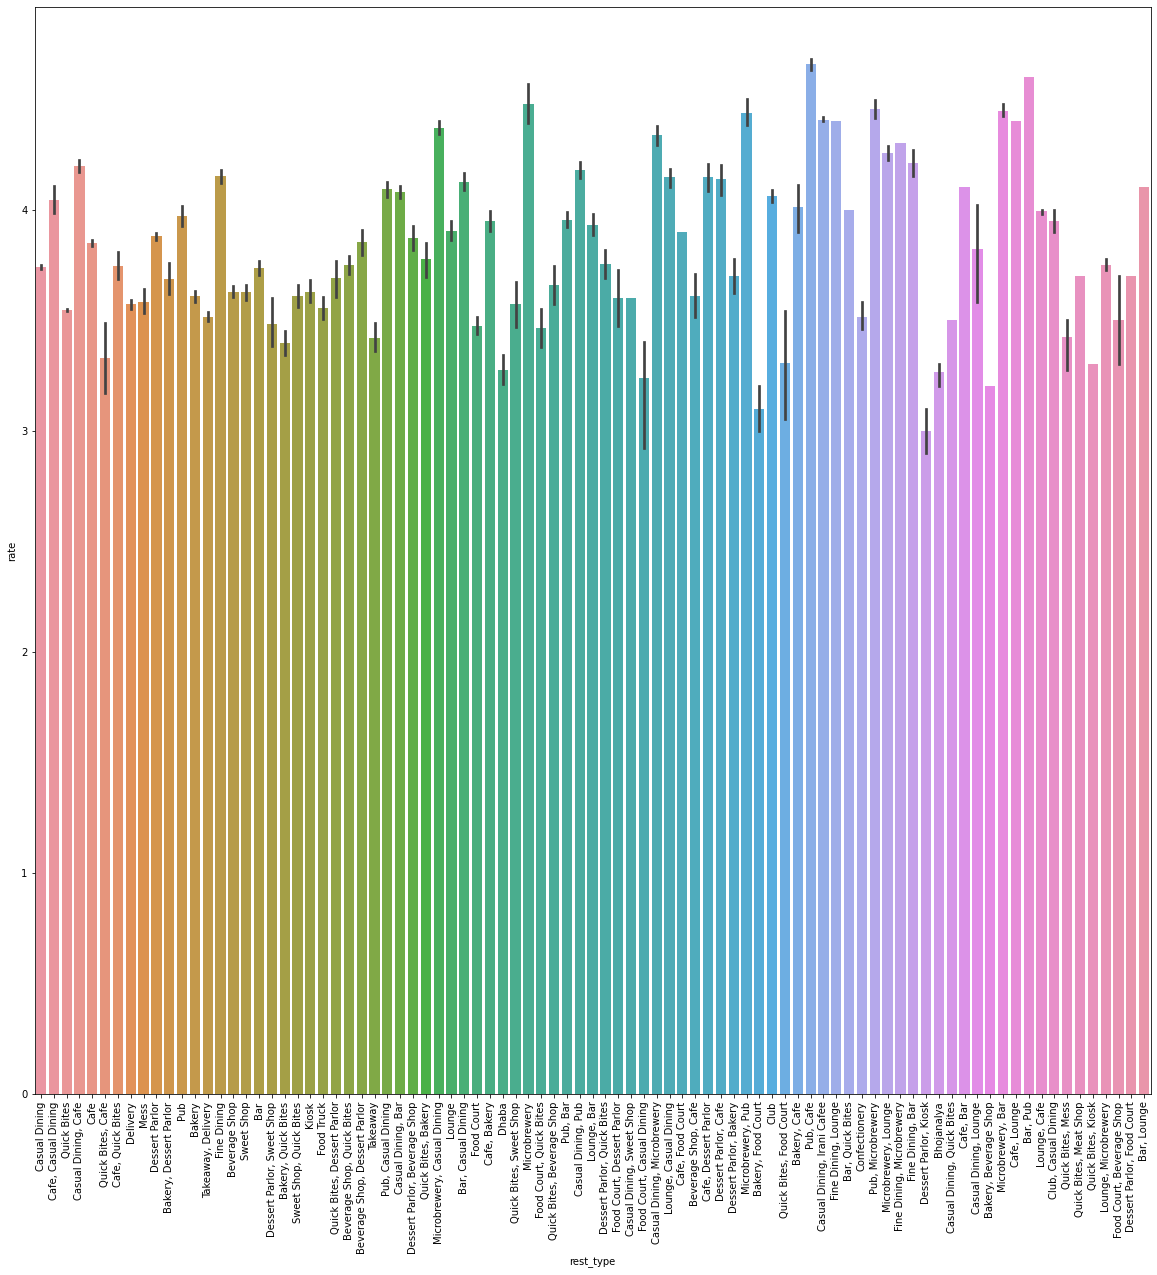

In [132]:
## The ratings given by customer based on the mode of dining they tried in the restaurant.
plt.figure(figsize=(20,20))
sns.barplot(new_df.rest_type,new_df.rate)
plt.xticks(rotation=90);

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


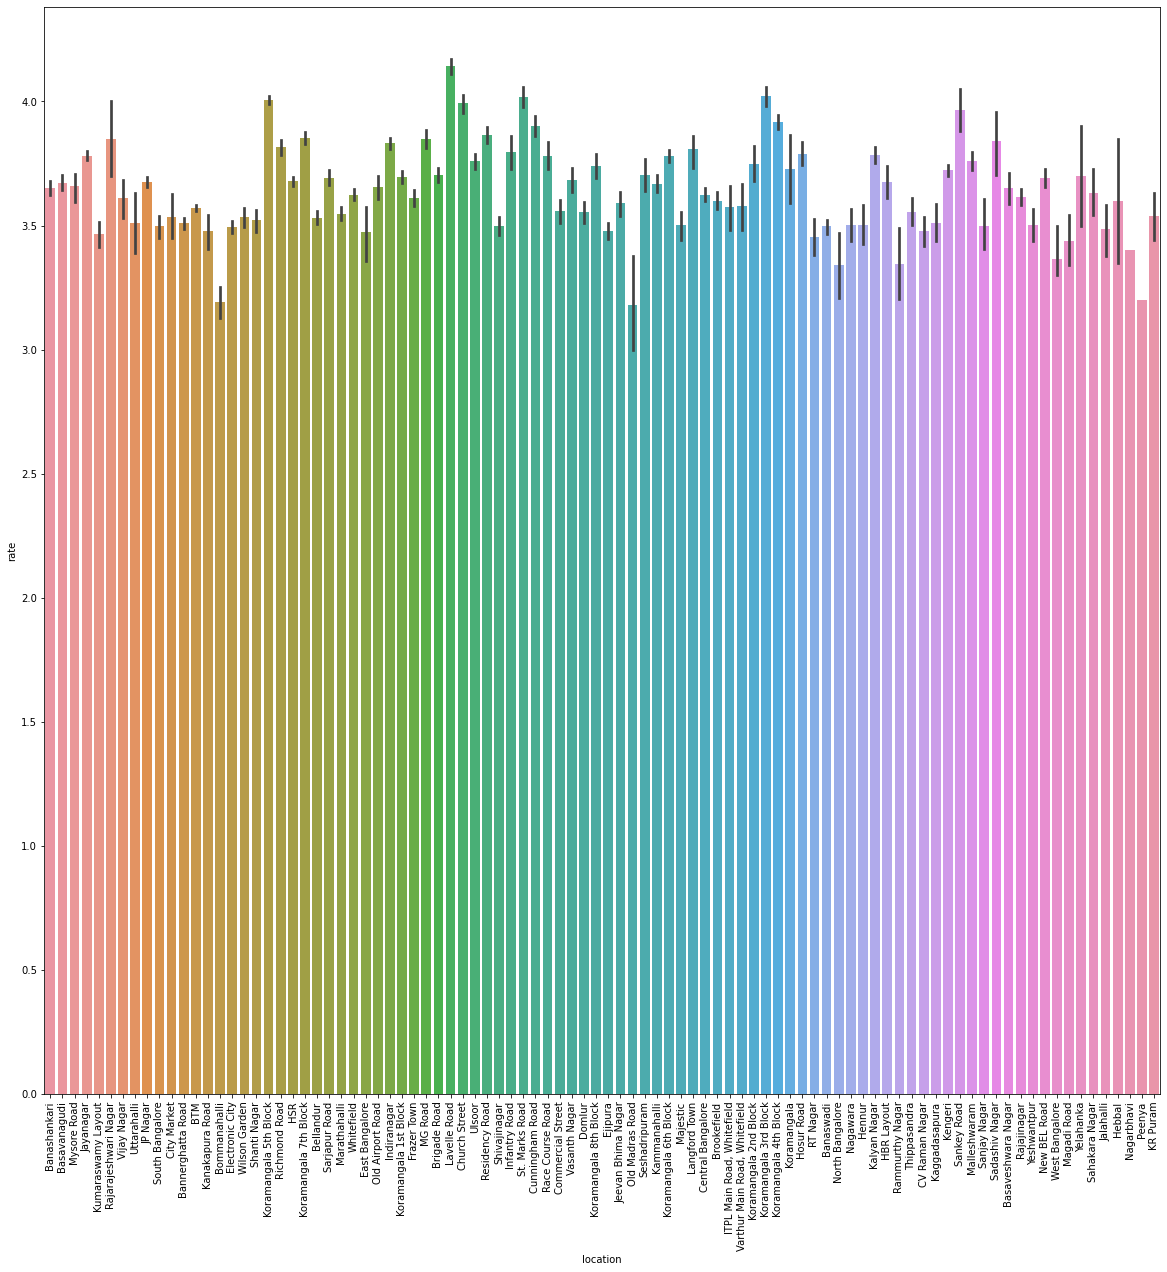

In [136]:
## Customers rating based on the location the restaurants are situated.
plt.figure(figsize=(20,20))
sns.barplot(new_df.location,new_df.rate)
plt.xticks(rotation=90,);

(0.0, 8000.0)

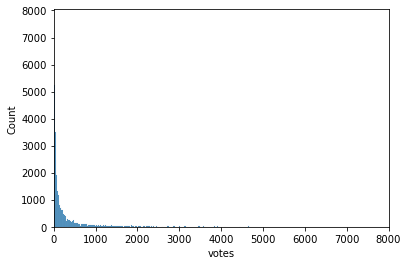

In [137]:
sns.histplot(new_df.votes)
plt.xlim(0,8000)

# OUTLIER DETECTION

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='votes', ylabel='rate'>

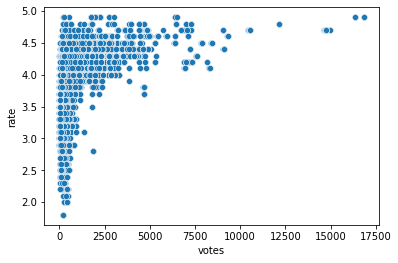

In [138]:
sns.scatterplot(new_df.votes,new_df.rate)

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='rate'>

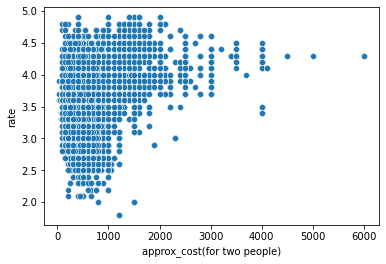

In [139]:
sns.scatterplot(new_df['approx_cost(for two people)'],new_df.rate)

In [140]:
new_df['approx_cost(for two people)'].describe()

count    41263.000000
mean       603.914063
std        464.942973
min         40.000000
25%        300.000000
50%        500.000000
75%        750.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

In [141]:
new_df=new_df.rename(columns={'approx_cost(for two people)':'cost'})

In [249]:
new_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [238]:
#Function to identify the outer fence and inner fence values using IQR method to filter the values withing that range
def outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    upper_fence = q3+(1.5*iqr)
    lower_fence = q1-(1.5*iqr)
    return upper_fence,lower_fence
outlier(new_df.cost)

(1425.0, -375.0)

In [244]:
new_df1=new_df.copy()

new_df1.loc[(new_df1.cost>=1425),'cost']=1425

In [247]:
new_df1

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
41258,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
41259,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
41260,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1425,Pubs and bars
41261,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,1425,Pubs and bars


In [245]:
def outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    upper_fence = q3+(1.5*iqr)
    lower_fence = q1-(1.5*iqr)
    return upper_fence,lower_fence
outlier(new_df.votes)

(661.0, -363.0)

In [246]:
new_df3=new_df1.copy()

new_df3.loc[(new_df3.cost>=661.0),'cost']=661.0

In [248]:
new_df3.votes.describe()

count    41263.000000
mean       352.683179
std        884.177761
min          0.000000
25%         21.000000
50%         73.000000
75%        277.000000
max      16832.000000
Name: votes, dtype: float64

In [150]:
new_df3.location.value_counts()

BTM                      3794
Koramangala 5th Block    2214
HSR                      1964
Indiranagar              1739
JP Nagar                 1675
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Peenya                      1
Nagarbhavi                  1
Name: location, Length: 92, dtype: int64

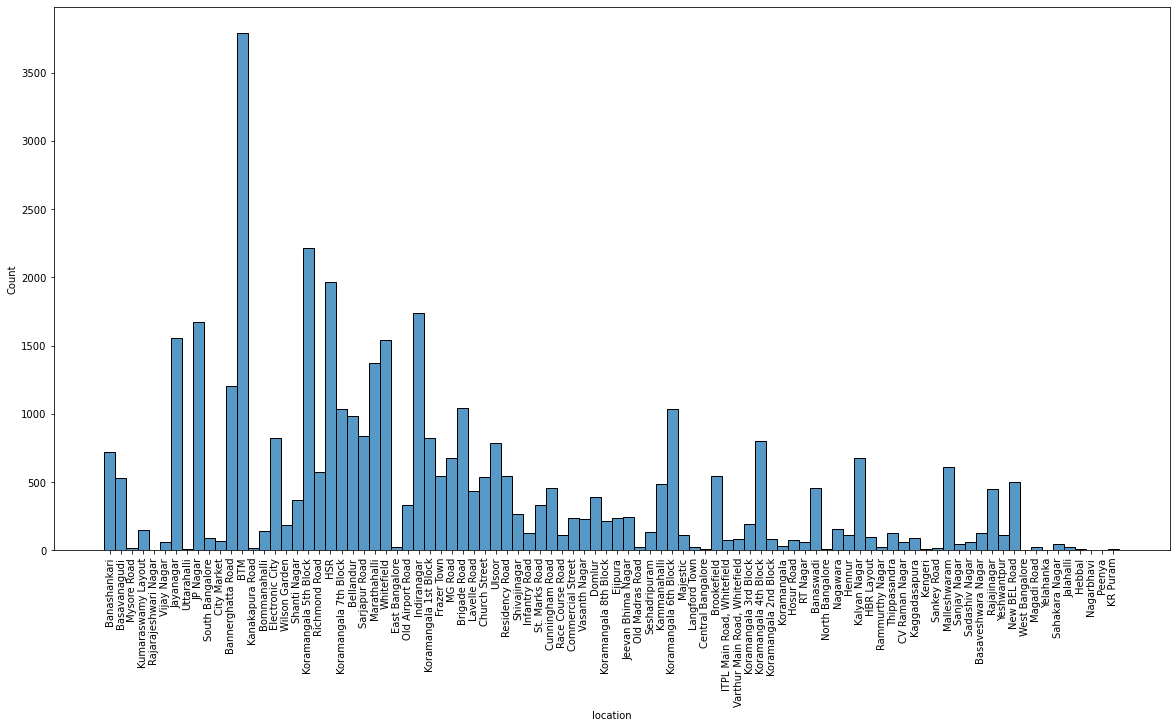

In [161]:
plt.figure(figsize=(20,10))
sns.histplot(new_df3.location)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='rate', ylabel='Count'>

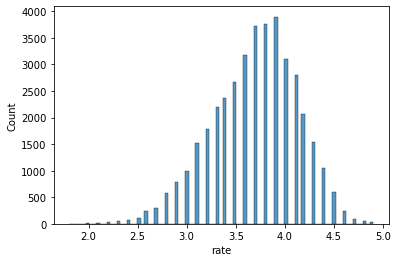

In [162]:
sns.histplot(new_df3.rate)

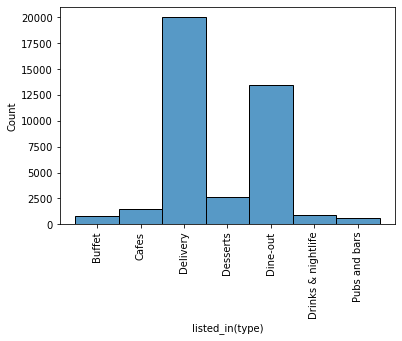

In [164]:
sns.histplot(new_df3['listed_in(type)'])
plt.xticks(rotation=90);

In [251]:
new_df3.cuisines.nunique()

2367

In [ ]:
# There are many categorical variables in the dataset.so I have used label encoder to encode those variable values.

In [252]:
from sklearn.preprocessing import LabelEncoder

In [253]:
LE = LabelEncoder()

In [254]:
new_df3['online_order'] = LE.fit_transform(new_df3['online_order'])

In [255]:
new_df3['book_table'] = LE.fit_transform(new_df3['book_table'])
new_df3['location'] = LE.fit_transform(new_df3['location'])
new_df3['listed_in(type)'] = LE.fit_transform(new_df3['listed_in(type)'])

In [256]:
new_df3 = new_df3.reset_index(drop=True)

In [257]:
new_df3

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_in(type)
0,Jalsa,1,1,4.1,775,1,Casual Dining,"North Indian, Mughlai, Chinese",661,0
1,Spice Elephant,1,0,4.1,787,1,Casual Dining,"Chinese, North Indian, Thai",661,0
2,San Churro Cafe,1,0,3.8,918,1,"Cafe, Casual Dining","Cafe, Mexican, Italian",661,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,Quick Bites,"South Indian, North Indian",300,0
4,Grand Village,0,0,3.8,166,4,Casual Dining,"North Indian, Rajasthani",600,0
...,...,...,...,...,...,...,...,...,...,...
41258,The Farm House Bar n Grill,0,0,3.7,34,88,"Casual Dining, Bar","North Indian, Continental",661,6
41259,Bhagini,0,0,2.5,81,88,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",661,6
41260,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,88,Bar,Continental,661,6
41261,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,26,Bar,Finger Food,661,6


In [258]:
new_df4 = new_df3.copy()
new_df4['rest_type'] = new_df4['rest_type'].str.split(',')
new_df4['cuisines'] = new_df4['cuisines'].str.split(',')
new_df4.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_in(type)
0,Jalsa,1,1,4.1,775,1,[Casual Dining],"[North Indian, Mughlai, Chinese]",661,0
1,Spice Elephant,1,0,4.1,787,1,[Casual Dining],"[Chinese, North Indian, Thai]",661,0
2,San Churro Cafe,1,0,3.8,918,1,"[Cafe, Casual Dining]","[Cafe, Mexican, Italian]",661,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,[Quick Bites],"[South Indian, North Indian]",300,0
4,Grand Village,0,0,3.8,166,4,[Casual Dining],"[North Indian, Rajasthani]",600,0


In [259]:
df.cuisines.value_counts()

North Indian                                                   2913
North Indian, Chinese                                          2385
South Indian                                                   1828
Biryani                                                         918
Bakery, Desserts                                                911
                                                               ... 
Seafood, North Indian, Chinese, Andhra, Biryani, Kebab            1
Coffee, South Indian                                              1
Biryani, North Indian, Chinese, Kebab                             1
Sandwich, Salad, North Indian, Chinese                            1
Asian, Continental, Mediterranean, Salad, American, Biryani       1
Name: cuisines, Length: 2723, dtype: int64

In [260]:
new_df4 = new_df4.copy()
new_df4['rest_type'] = new_df4['rest_type'].apply(lambda x:[i.strip(' ') for i in x])
new_df4['cuisines'] = new_df4['cuisines'].apply(lambda x:[i.strip(' ') for i in x])
new_df4.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_in(type)
0,Jalsa,1,1,4.1,775,1,[Casual Dining],"[North Indian, Mughlai, Chinese]",661,0
1,Spice Elephant,1,0,4.1,787,1,[Casual Dining],"[Chinese, North Indian, Thai]",661,0
2,San Churro Cafe,1,0,3.8,918,1,"[Cafe, Casual Dining]","[Cafe, Mexican, Italian]",661,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,[Quick Bites],"[South Indian, North Indian]",300,0
4,Grand Village,0,0,3.8,166,4,[Casual Dining],"[North Indian, Rajasthani]",600,0


In [261]:
new_df5 = new_df4.copy()

## In the data the rest_type column has many distinct values which were in combinations.so we can't simplt use labelencoder()
## To deal with those values 
## So we make each distinct value in 'rest_type' as a column to get better outcome from the attribute.

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in new_df5.iterrows():
    for rest_type in row['rest_type']:
        new_df5.at[index, rest_type] = 1

new_df5 = new_df5.fillna(0)
new_df5.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_in(type),...,Food Truck,Microbrewery,Lounge,Food Court,Dhaba,Club,Irani Cafee,Confectionery,Bhojanalya,Meat Shop
0,Jalsa,1,1,4.1,775,1,[Casual Dining],"[North Indian, Mughlai, Chinese]",661,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Spice Elephant,1,0,4.1,787,1,[Casual Dining],"[Chinese, North Indian, Thai]",661,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,San Churro Cafe,1,0,3.8,918,1,"[Cafe, Casual Dining]","[Cafe, Mexican, Italian]",661,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,[Quick Bites],"[South Indian, North Indian]",300,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Grand Village,0,0,3.8,166,4,[Casual Dining],"[North Indian, Rajasthani]",600,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [262]:
new_df6 = new_df5.copy()
#since the attribute 'cuisine' also has many distinct categorical values in it we have encoded it withpout using labelencoder.
#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in new_df6.iterrows():
    for cuisines in row['cuisines']:
        new_df6.at[index, cuisines] = 1

new_df6 = new_df6.fillna(0)
new_df6.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_in(type),...,British,Paan,German,Russian,Drinks Only,Jewish,Vegan,Pan Asian,Raw Meats,Sindhi
0,Jalsa,1,1,4.1,775,1,[Casual Dining],"[North Indian, Mughlai, Chinese]",661,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Spice Elephant,1,0,4.1,787,1,[Casual Dining],"[Chinese, North Indian, Thai]",661,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,San Churro Cafe,1,0,3.8,918,1,"[Cafe, Casual Dining]","[Cafe, Mexican, Italian]",661,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,[Quick Bites],"[South Indian, North Indian]",300,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Grand Village,0,0,3.8,166,4,[Casual Dining],"[North Indian, Rajasthani]",600,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [263]:
## dropping the attributes for which we have performed encoding .
new_df6.drop(['name','rest_type','cuisines'],axis=1,inplace=True)

In [264]:
new_df6

,online_order,book_table,rate,votes,location,cost,listed_in(type),Casual Dining,Cafe,Quick Bites,...,British,Paan,German,Russian,Drinks Only,Jewish,Vegan,Pan Asian,Raw Meats,Sindhi
0,1,1,4.1,775,1,661,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,4.1,787,1,661,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,3.8,918,1,661,0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,3.7,88,1,300,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,3.8,166,4,600,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41258,0,0,3.7,34,88,661,6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41259,0,0,2.5,81,88,661,6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41260,0,0,3.6,27,88,661,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41261,0,1,4.3,236,26,661,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting the data into independent and dependent variable

In [265]:
X = new_df6.drop('rate',axis=1)
y = new_df6.rate

In [266]:
X

,online_order,book_table,votes,location,cost,listed_in(type),Casual Dining,Cafe,Quick Bites,Delivery,...,British,Paan,German,Russian,Drinks Only,Jewish,Vegan,Pan Asian,Raw Meats,Sindhi
0,1,1,775,1,661,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,787,1,661,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,918,1,661,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,88,1,300,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,166,4,600,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41258,0,0,34,88,661,6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41259,0,0,81,88,661,6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41260,0,0,27,88,661,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41261,0,1,236,26,661,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
41258    3.7
41259    2.5
41260    3.6
41261    4.3
41262    3.4
Name: rate, Length: 41263, dtype: float64

In [269]:
## checking for correlation between independent attributes.
def correl(dataset,thresh):
    col_corr = set()
    cor_matrix = X.corr()
    for i in range(len(cor_matrix)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j])>thresh:
                col_name=cor_matrix.columns[j]
                col_corr.add(col_name)
    return col_corr

In [270]:
correl(new_df6,0.9)

{'Jewish', 'Meat Shop'}

In [271]:
X.corr()

,online_order,book_table,votes,location,cost,listed_in(type),Casual Dining,Cafe,Quick Bites,Delivery,...,British,Paan,German,Russian,Drinks Only,Jewish,Vegan,Pan Asian,Raw Meats,Sindhi
online_order,1.000000,-0.054843,-0.013357,-0.074620,-0.032527,-0.239428,0.007249,-0.003371,0.049696,0.081089,...,-0.002343,-0.009632,-0.018020,-0.016683,-0.013621,0.008717,0.008717,0.003559,-0.008437,0.007117
book_table,-0.054843,1.000000,0.393186,0.091683,0.461293,0.114361,0.365735,0.045994,-0.309512,-0.116700,...,0.030674,-0.002956,-0.005531,0.028399,-0.004181,-0.005121,-0.005121,-0.002091,-0.004181,0.023187
votes,-0.013357,0.393186,1.000000,0.048620,0.316635,0.070491,0.214668,0.099922,-0.211656,-0.077445,...,0.005241,-0.002730,0.024770,0.035064,-0.003872,-0.002201,-0.002201,-0.001891,-0.003532,-0.002073
location,-0.074620,0.091683,0.048620,1.000000,0.101542,0.049790,0.047944,0.010608,-0.075726,-0.012332,...,0.011204,-0.003616,0.003312,-0.003980,-0.000267,-0.006720,-0.006720,0.004155,-0.000267,0.006818
cost,-0.032527,0.461293,0.316635,0.101542,1.000000,0.087030,0.583026,0.210829,-0.564729,-0.054136,...,0.014802,-0.014229,0.014802,0.013704,-0.020124,0.013704,0.013704,-0.001690,-0.005472,0.011189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jewish,0.008717,-0.005121,-0.002201,-0.006720,0.013704,-0.004880,-0.007808,0.033175,-0.009183,-0.003344,...,-0.000157,-0.000084,-0.000157,-0.000145,-0.000119,1.000000,1.000000,-0.000059,-0.000119,-0.000119
Vegan,0.008717,-0.005121,-0.002201,-0.006720,0.013704,-0.004880,-0.007808,0.033175,-0.009183,-0.003344,...,-0.000157,-0.000084,-0.000157,-0.000145,-0.000119,1.000000,1.000000,-0.000059,-0.000119,-0.000119
Pan Asian,0.003559,-0.002091,-0.001891,0.004155,-0.001690,-0.003394,0.007604,-0.001790,-0.003749,-0.001365,...,-0.000064,-0.000034,-0.000064,-0.000059,-0.000048,-0.000059,-0.000059,1.000000,-0.000048,-0.000048
Raw Meats,-0.008437,-0.004181,-0.003532,-0.000267,-0.005472,0.001624,-0.006375,-0.003579,0.012931,-0.002730,...,-0.000128,-0.000069,-0.000128,-0.000119,-0.000097,-0.000119,-0.000119,-0.000048,1.000000,-0.000097


In [272]:
## drop the columns which are highly correlated.
X.drop(['Jewish', 'Meat Shop'],axis=1)

,online_order,book_table,votes,location,cost,listed_in(type),Casual Dining,Cafe,Quick Bites,Delivery,...,Mongolian,British,Paan,German,Russian,Drinks Only,Vegan,Pan Asian,Raw Meats,Sindhi
0,1,1,775,1,661,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,787,1,661,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,918,1,661,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,88,1,300,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,166,4,600,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41258,0,0,34,88,661,6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41259,0,0,81,88,661,6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41260,0,0,27,88,661,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41261,0,1,236,26,661,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
from sklearn.model_selection import train_test_split

In [274]:
## splitting the data into train and test

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [276]:
print("Shape of x_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of x_train dataset:  (27646, 133)
Shape of y_train dataset:  (27646,)
Shape of X_test dataset:  (13617, 133)
Shape of y_test dataset:  (13617,)


In [277]:
## MINMAX scaler -STANDARDISATION
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

scaled_train_array=scaler.transform(X_train)
scaled_train=pd.DataFrame(data=scaled_train_array,columns=X_train.columns) #standardised independant variables/training set

scaled_test_array=scaler.transform(X_test)
scaled_test=pd.DataFrame(data=scaled_test_array,columns=X_test.columns)   #standardised independant variables/ test set

# MODEL BUILDING

In [278]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [279]:
# para_dict = {
#    'n_estimators' : [100,200,400,500,800,1000],
#   'max_depth' : [5,10,15,20,25,30],
#    'max_features' : ['auto','sqrt','log2'],
#    'min_samples_leaf' : [1,2,3,4]
#}

In [196]:
# search = RandomizedSearchCV(model,para_dict,n_iter=20)

In [198]:
# search.fit(X_train,y_train)

In [67]:
# search.best_estimator_

In [68]:
#For n_iter = 20
#RandomForestRegressor(max_depth=30, n_estimators=400)

#For n_iter = 10
#RandomForestRegressor(max_depth=25, min_samples_leaf=2, n_estimators=800)

In [280]:
tree = RandomForestRegressor(max_depth=30, n_estimators=400)

In [281]:
tree.fit(scaled_train,y_train)

RandomForestRegressor(max_depth=30, n_estimators=400)

In [282]:
train_pred=tree.predict(scaled_train)
test_pred = tree.predict(scaled_test)

In [283]:
tree.score(scaled_train,y_train)

0.987253240960988

In [284]:
tree.score(scaled_test,y_test)

0.9162158899715753

In [285]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [286]:
def eval_metrics_exp(actual_train,actual_test,pred_train,pred_test):
    #for Training data
    MAE_train=mean_absolute_error(actual_train,pred_train)
    RMSE_train=np.sqrt(mean_squared_error(actual_train,pred_train))
    R_2_train = r2_score(actual_train,pred_train)
    #for Test data
    MAE_test=mean_absolute_error(actual_test,pred_test)
    RMSE_test=np.sqrt(mean_squared_error(actual_test,pred_test))
    R_2_trest = r2_score(actual_test,pred_test)
    eva_df=pd.DataFrame({'Training set':[MAE_train,RMSE_train,R_2_train],
                    'Testing set':[MAE_test,RMSE_test,R_2_trest]},
                    index =['MAE','RMSE','R2 SCORE'])
    return eva_df

In [287]:
rf_metrics=eval_metrics_exp(y_train,y_test,train_pred,test_pred)
rf_metrics

,Training set,Testing set
MAE,0.024220,0.060134
RMSE,0.049735,0.127032
R2 SCORE,0.987253,0.916216


The performance is much better with random forest but we will also try fitting other model to check if they perform better than random forest.

In [304]:
Importance=pd.DataFrame(data = tree.feature_importances_,index=X.columns
             ,columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

In [305]:
Importance

,Feature Importance
votes,5.266547e-01
location,9.956923e-02
cost,5.863446e-02
Chinese,2.661936e-02
North Indian,2.128963e-02
...,...
German,1.345879e-06
Irani Cafee,1.030043e-06
Drinks Only,7.607352e-07
Bhojanalya,6.040543e-07


# Support vector machine

In [289]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(scaled_train,y_train)

SVR()

In [293]:
pred_train_svm=svm.predict(scaled_train) 
pred_test_svm=svm.predict(scaled_test)

In [306]:
svm_metrics=eval_metrics_exp(y_train,y_test,pred_train_svm, pred_test_svm)
svm_metrics

,Training set,Testing set
MAE,0.189928,0.204030
RMSE,0.272023,0.287748
R2 SCORE,0.618676,0.570111


In [234]:
#Checking the performance of all four kernels
kernel=['linear','rbf','poly','sigmoid']
for i in kernel:
    svm_model=SVR(kernel=i).fit(scaled_train,y_train)
    pred_train_svm=svm_model.predict(scaled_train)
    pred_test_svm=svm_model.predict(scaled_test)
    RMSE_train=np.sqrt(mean_squared_error(y_train,pred_train_svm))
    RMSE_test=np.sqrt(mean_squared_error(y_test,pred_test_svm))
    print('RMSE of train is : %f and RMSE of test is : %f when kernel is %s' %(RMSE_train,RMSE_test,i))

RMSE of train is : 0.348531 and RMSE of test is : 0.350400 when kernel is linear
RMSE of train is : 0.265257 and RMSE of test is : 0.280047 when kernel is rbf
RMSE of train is : 0.267743 and RMSE of test is : 0.282646 when kernel is poly
RMSE of train is : 88.866251 and RMSE of test is : 88.862627 when kernel is sigmoid


# XGBOOST REGRESSOR

In [307]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [308]:
#prediction
pred_train_xgb=xgb_model.predict(X_train)
pred_test_xgb=xgb_model.predict(X_test)

In [309]:
#Performance metrics
xgb_model_metrics=eval_metrics_exp(y_train,y_test,pred_train_xgb, pred_test_xgb)
xgb_model_metrics

,Training set,Testing set
MAE,0.151190,0.166088
RMSE,0.216564,0.237783
R2 SCORE,0.758311,0.706441


SVM and Random forest have performed  well. But Random forest performed better compared to other models.So we choose RandomForest regressor as our final model for this Bangalore Zomato Restaurant dataset.